## Análisis Exploratorio de Datos (EDA)

### Importación de las bibliotecas necesarias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Importación de archivos

In [2]:
df_aire = pd.read_csv("aire_cleaned.csv")
df_sonidos = pd.read_csv("sonidos_cleaned.csv")

### Calidad del Aire

In [3]:
# Creamos un nuevo Dataframe con información de Nitrogen dioxide (NO2)
df_dioxido_nitrogeno = df_aire[df_aire["Pollutant"] == "Nitrogen dioxide (NO2)"]

In [4]:
df_dioxido_nitrogeno["Data Value"].describe()

count    114.000000
mean      17.096140
std        2.716998
min       11.120000
25%       15.337500
50%       16.885000
75%       18.590000
max       25.230000
Name: Data Value, dtype: float64

Se puede notar lo siguiente:

- count: Se registraron 114 mediciones de dióxido de nitrógeno (NO2).
- mean: Se registraron aproximadamente  17.096140 ppb de dióxido de nitrógeno (NO2) en promedio.
- std: Desviación estándar de aproximadamente 2.716998 ppb para los valores de dióxido de nitrógeno (NO2).
- min: El valor mínimo registrado es de 11.120000 ppb de dióxido de nitrógeno (NO2).
- 25% (percentil 25): El 25% más bajo de los valores de dióxido de nitrógeno (NO2) está por debajo de 15.337500 ppb.
- 50% (percentil 50): La mediana es de aproximadamente 16.885000 ppb de dióxido de nitrógeno (NO2).
- 75% (percentil 75): El 75% de los valores de dióxido de nitrógeno (NO2) están por debajo de 18.590000 ppb.
- max: El valor máximo registrado es de 25.230000 ppb de dióxido de nitrógeno (NO2).

In [5]:
# Creamos un nuevo Dataframe con información de Nitrogen dioxide (NO2)
df_particulas_finas = df_aire[df_aire["Pollutant"] == "Fine particles (PM 2.5)"]

In [6]:
df_particulas_finas["Data Value"].describe()

count    114.000000
mean       6.786404
std        0.594759
min        5.920000
25%        6.430000
50%        6.630000
75%        6.987500
max        8.950000
Name: Data Value, dtype: float64

Se puede notar lo siguiente:

- count: Se regstraron 114 mediciones de partículas finas (PM 2.5).
- mean: Se registraron aproximadamente 6.786404 μg/m³ de partículas finas (PM 2.5) en promedio.
- std: Desviación estándar de aproximadamente 0.594759 μg/m³ para los valores de partículas finas (PM 2.5).
- min: El valor mínimo registrado es de 5.920000 μg/m³ de partículas finas (PM 2.5).
- 25% (percentil 25): El 25% más bajo de los valores de partículas finas (PM 2.5) está por debajo de 6.430000 μg/m³.
- 50% (percentil 50): La mediana es de aproximadamente 6.630000 μg/m³ de partículas finas (PM 2.5).
- 75% (percentil 75): El 75% de los valores de partículas finas (PM 2.5) están por debajo de 6.987500 μg/m³.
- max: El valor máximo registrado es de 8.950000 μg/m³ de partículas finas (PM 2.5).

In [7]:
# Creamos el DataFrame para el total general por 'Geo Place Name'
total_values = df_aire.groupby('Geo Place Name')['Data Value'].sum().reset_index()

# Redondeamos los valores a 2 decimales
total_values['Data Value'] = total_values['Data Value'].round(2)

# Ordenamos el DataFrame por los valores de contaminantes de manera descendente y seleccionamos las primeras 5 filas
top_5_cities = total_values.sort_values(by='Data Value', ascending=False).head(5)

# Creamos el gráfico de barras con las 5 ciudades con los valores más altos
fig = px.bar(top_5_cities, x='Geo Place Name', y='Data Value',
             title='Top 5 Ciudades con los Valores Más Altos de Contaminantes en el Aire (2021)',
             template='plotly_white')

# Ajustamos el diseño del gráfico y agregamos las etiquetas de texto encima de las barras
fig.update_traces(marker_line=dict(color='black', width=1.5),
                  text=top_5_cities['Data Value'],  # Utilizamos los valores como texto
                  textposition='inside',  # Posicionamos el texto dentro de las barras
                  )

# Ajustamos el diseño del gráfico
fig.update_layout(
    xaxis=dict(tickangle=-45),
    xaxis_title='Geo Place Name',
    yaxis_title='Niveles de Contaminantes',
    title_x=0.5  # Ajuste para centrar el título horizontalmente
)

# Mostramos el gráfico
fig.show()

Se observa que las zonas con mayor nivel de contaminantes en el aire es Midtown (CD5) perteneciente al Distrito de Manhattan; seguida Chelsea - Clinton, Gramercy Park - Murray  Hill, Chesea - Village y Clinton and Chelsea (CD4), todas pertenecientes igualmente al Distrito de Manhattan.

### Calidad del Sonido

<Figure size 1000x600 with 0 Axes>

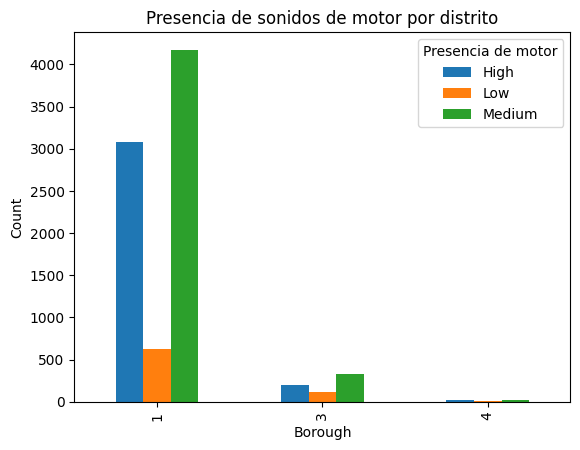

In [4]:
plt.figure(figsize=(10, 6))
df_sonidos.groupby('Borough')['Engine Sound'].value_counts().unstack().plot(kind='bar')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.title('Presencia de sonidos de motor por distrito')
plt.legend(title='Presencia de motor')
plt.show()

El distrito con mayor ocurrencia de sonidos causados por actividad de motor es en el distrito 1 correspondiente a Manhattan, con una mayor presencia de Ruidos Medios (Medium) de más de 4000 observaciones, además tiene al rededor de 3000 observaciones con presencia de Ruidos Altos (High) y finalmente una cantidad de más de 500 observaciones con presencia de Ruidos Bajos (low). Por otro lado se puede apreciar que en promedio no hay muchos sonidos ocasionados por el motor de los autos en el distrito 4 perteneciente a Bronx.

In [5]:
# Realizamos el conteo de frecuencia
counts = df_sonidos['Engine Sound'].value_counts()

# Definimos el orden de las categorías
categories_order = ['Low', 'Medium', 'High']

# Reordenamos los resultados de acuerdo al orden definido
counts = counts.reindex(categories_order)

# Creamos el gráfico de barras con Plotly
fig = px.bar(x=counts.index, y=counts.values, color=counts.index,
             labels={'x': 'Nivel de Sonido', 'y': 'Frecuencia'},
             title='Distribución de Niveles de Sonido',
             template='plotly_white')

# Añadimos etiquetas de conteo encima de las barras con fuente en negrita y flecha
for i, count in enumerate(counts):
    fig.add_annotation(
        x=counts.index[i],
        y=count + 1,
        text=str(count),
        showarrow=True,
        arrowhead=5,
        ax=0,
        ay=-40,
        font=dict(size=12, color='black', family='Arial')  # Configuramos la fuente en negrita
    )

# Añadimos bordes a las columnas
fig.update_traces(marker_line=dict(color='black', width=1.5))

# Ajustamos el diseño del gráfico
fig.update_layout(
    xaxis_title='Nivel de Sonido',
    yaxis_title='Frecuencia',
    title_x=0.5  # Ajuste para centrar el título horizontalmente
)

# Mostramos el gráfico
fig.show()

Se observa un conteo superior de Ruidos Medios (Medium) en la Ciudad de New Yor, seguido de Ruidos Altos (Hight) y finalmente una menor cantidad de Ruidos Bajos (Low).

In [6]:
# Creamos un DataFrame para contar la frecuencia por hora
hour_counts = df_sonidos['Hour'].value_counts().sort_index().reset_index()
hour_counts.columns = ['Hour', 'Frequency']

# Creamos el gráfico de barras con Plotly Express
fig = px.bar(hour_counts, x='Hour', y='Frequency', 
             labels={'Frequency': 'Frecuencia', 'Hour': 'Hora del Día'},
             title='Frecuencia de Sonidos Registrados por Hora del Día',
             template='plotly_white')

# Añadimos bordes a las barras
fig.update_traces(marker_line_color='black', marker_line_width=1.5)

# Añadimos etiquetas encima de las barras con flecha
for i, row in hour_counts.iterrows():
    fig.add_annotation(
        x=row['Hour'],
        y=row['Frequency'],
        text=str(row['Frequency']),
        showarrow=True,
        arrowhead=5,
        ax=0,
        ay=-30
    )

# Configuramos el diseño del gráfico
fig.update_layout(
    xaxis=dict(tickmode='array', tickvals=list(range(24)), ticktext=[f"{i:02}:00" for i in range(24)]),
    title_x=0.5  # Ajuste para centrar el título horizontalmente
)

# Mostramos el gráfico
fig.show()

Se puede observar que desde las 08:00 hasta las 20:00 Hs es el rango horario donde mayor ruido de motor se registra en la Ciudad de New York.